# **- Starter Code**

In [68]:
#Starter Code
import matplotlib.pyplot as plt
from PIL import Image

# **- Given Functions**

In [69]:
#Function 1: Given an image, returns the image and it's squared version in array format
def toArrayAndSquare(im):
  img = [[0 for x in range(im.size[0])] for y in range(im.size[1])]
  sqr = [[0 for x in range(im.size[0])] for y in range(im.size[1])]
  for i in range (0,im.size[0]):
    for j in range (0,im.size[1]):
      img[j][i] = im.getpixel((i,j))
      sqr[j][i] = img[j][i] ** 2
  return img,sqr

#Function 2: Given an image, applies a certain threshold
def applyThreshold (im, th):
  res = [[0 for x in range(len(im[0]))] for y in range(len(im))]
  for i in range (0,len(im)):
    for j in range (0,len(im[0])):
      if(im[i][j]<th):
        res[i][j] = 0
      else:
        res[i][j] = 255
  return res

# **Read Image**

In [70]:
im = Image.open("sample_image.jpg")

# **- Task 1 Funtions**

In [71]:
import numpy as np
import copy

def calculateCooccurrenceHelper(ver_offset, hor_offset, im_array):
    co = np.zeros(shape=(256, 256))
    for m in range(len(im_array) - ver_offset):
        for n in range(len(im_array[m]) - hor_offset):
            co[im_array[m][n]][im_array[m + ver_offset][n + hor_offset]] += 1
    return co

def calculateCooccurrence(im):
    im_array,_ = toArrayAndSquare(im.convert("L"))
    return calculateCooccurrenceHelper(0, 1, im_array), calculateCooccurrenceHelper(1, 0, im_array)

def nullifyPixels(co_original, diff):
    co = copy.deepcopy(co_original)
    for i in range(256):
        for n in range(diff):
            j = i + n
            if j >=0 and  j < 256:
                co[i][j] = 0
            j = i - n
            if j >= 0 and j < 256:
                co[i][j] = 0
    return co


def imgWithCooccurrence(im,null_hor,null_ver):
    im_array,_ = toArrayAndSquare(im.convert("L"))
    im_recon = [[0] * len(im_array[x]) for x in range(len(im_array))]
    for m in range(len(im_array)-1):
        for n in range(len(im_array[m])-1):
            if null_hor[im_array[m][n]][im_array[m][n+1]] != 0 or null_ver[im_array[m][n]][im_array[m+1][n]] != 0:
                im_recon[m][n] = 255
            else:
                im_recon[m][n] = 0
    return im_recon

# **Task 1 Solution**

In [72]:
hor_co, ver_co = calculateCooccurrence(im) #calculate horizontal and vertical co-occurence matrices
diff = 30 #range for nullifying
null_hor = nullifyPixels(hor_co, diff)  #nullify horizontal co-occurence matrix
null_ver = nullifyPixels(ver_co, diff) #nullify vertical co-occurence matrix
im_recon = imgWithCooccurrence(im, null_hor, null_ver) #reconstruct image

# **Task 1 Output**

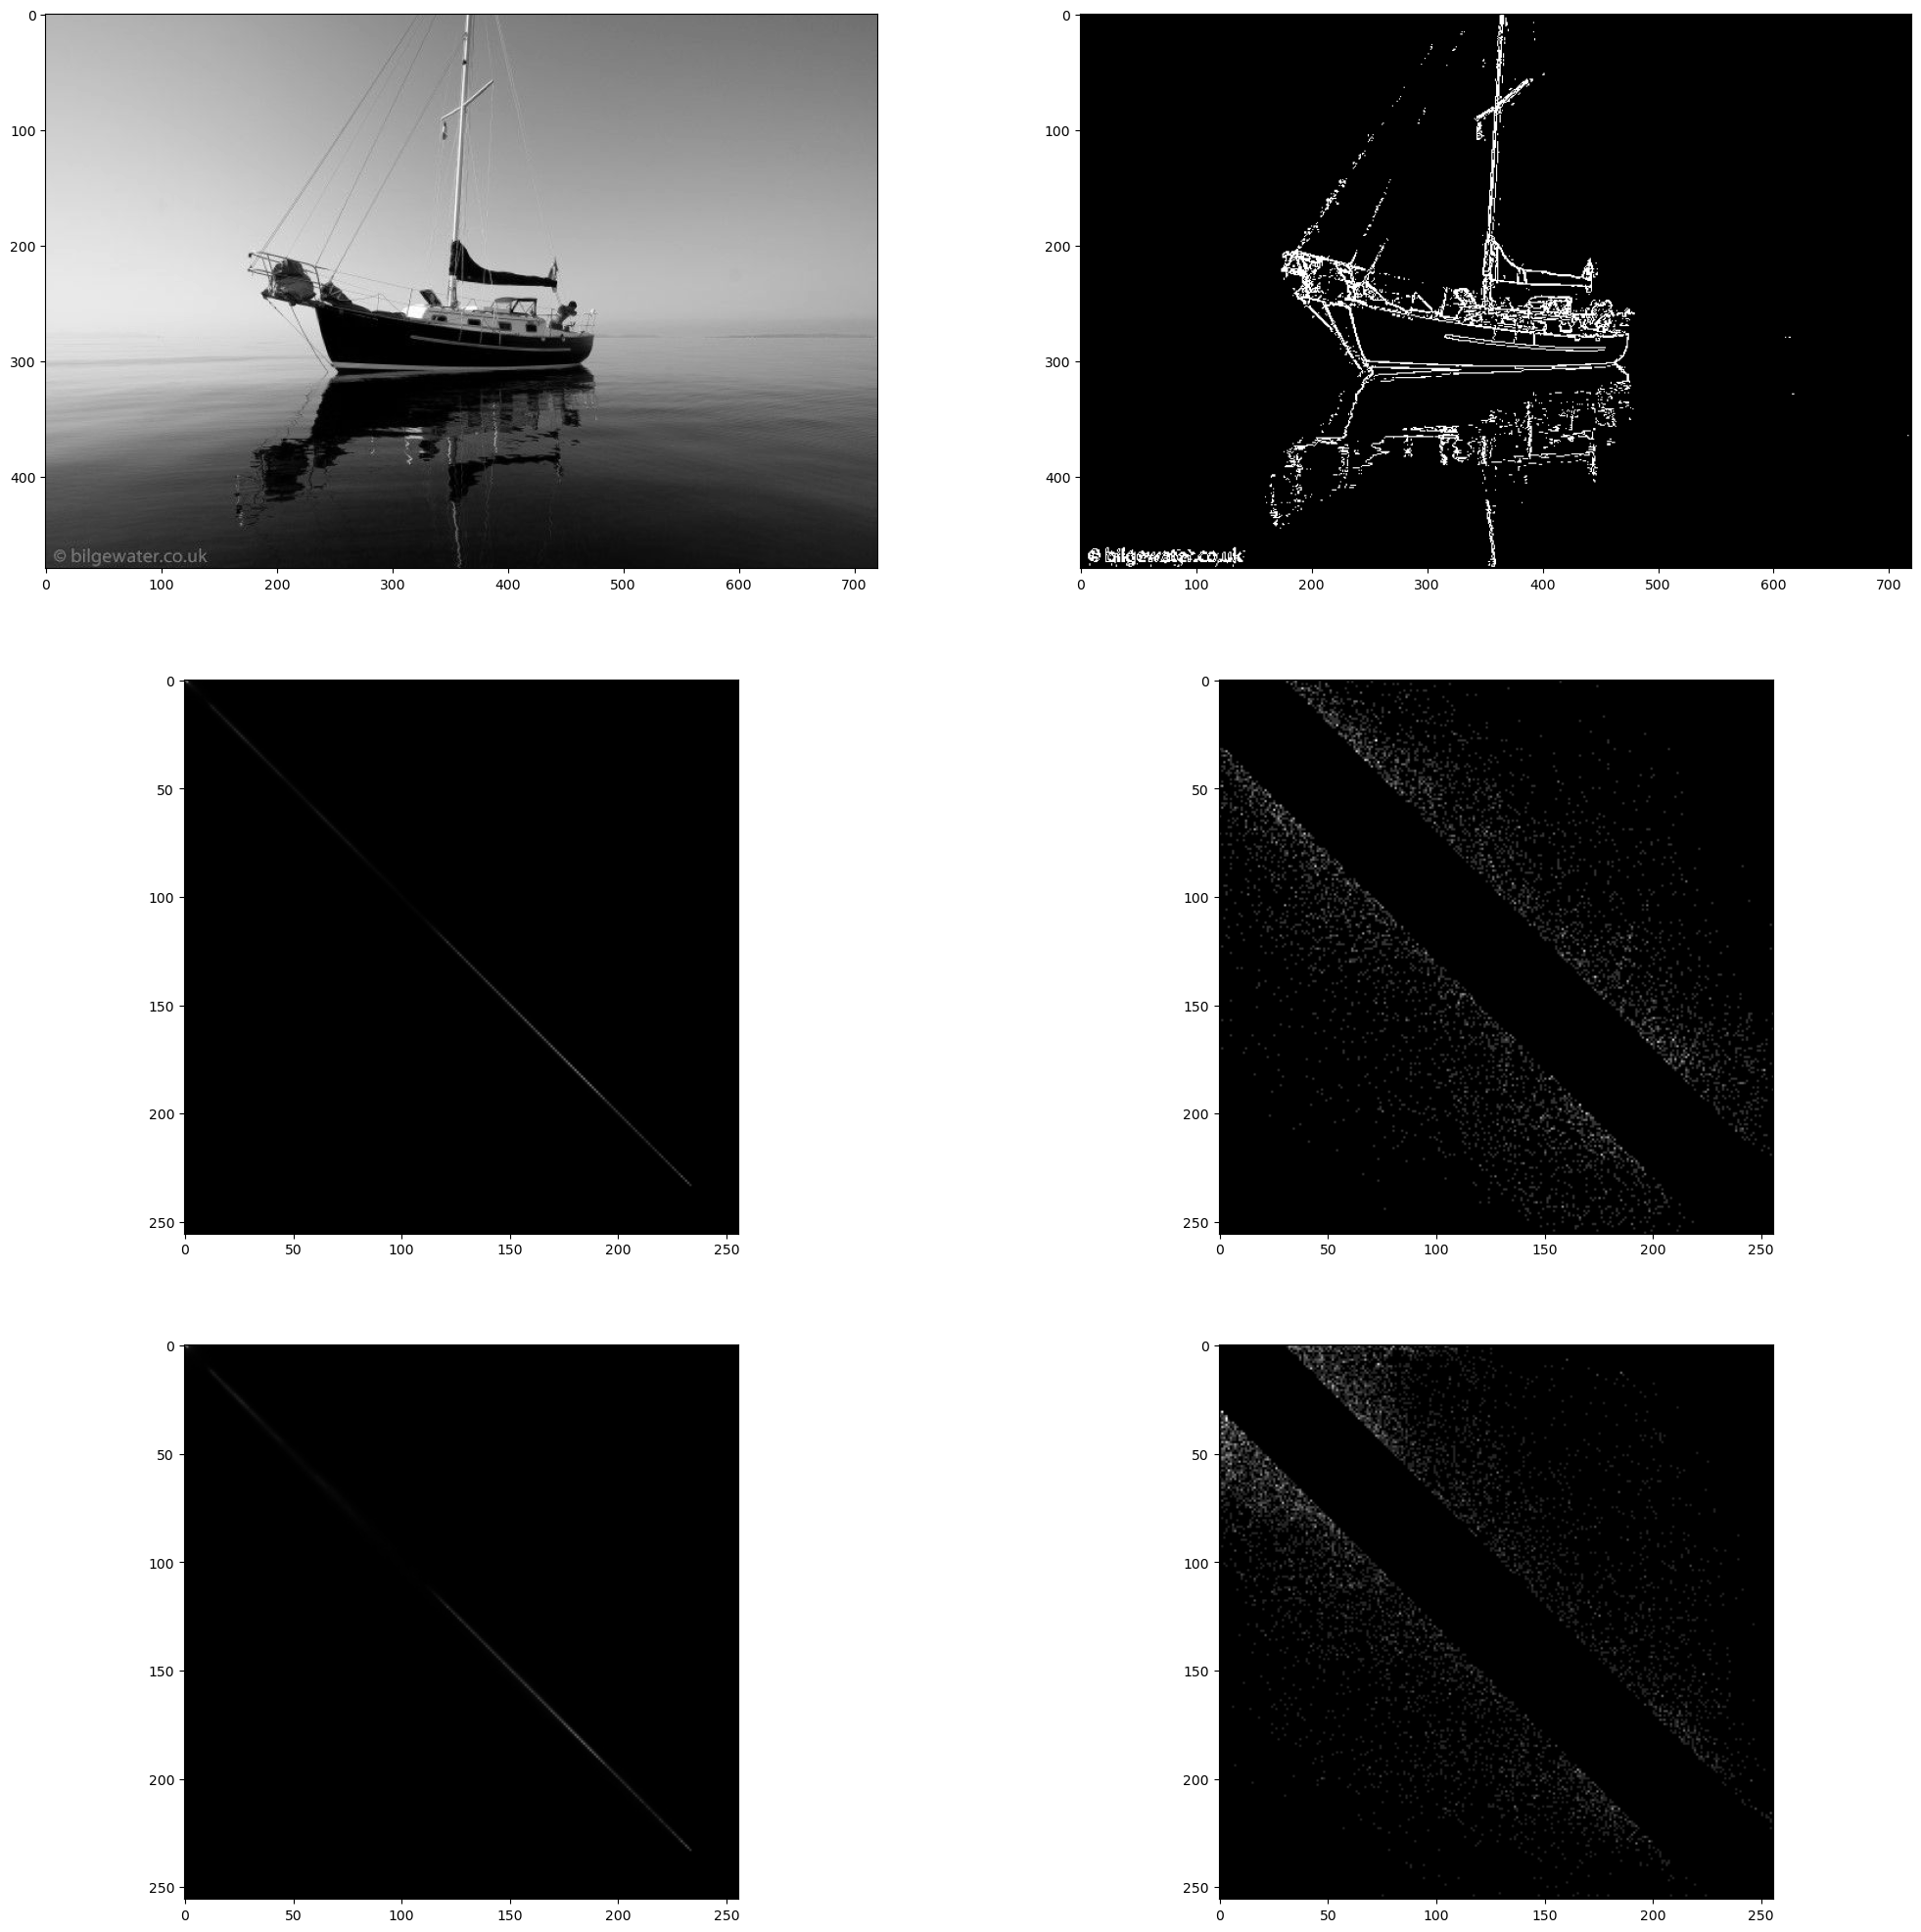

In [73]:

#plt has to be imported, see the previous sections
plt.subplots(nrows=3, ncols=2, figsize=(25, 25))

plt.subplot(3,2,1)
plt.imshow(toArrayAndSquare(im.convert("L"))[0], cmap='gray')

plt.subplot(3,2,2)
plt.imshow(im_recon, cmap='gray')

plt.subplot(3,2,3)
plt.imshow(hor_co, cmap='gray')

plt.subplot(3,2,4)
plt.imshow(null_hor, cmap='gray')

plt.subplot(3,2,5)
plt.imshow(ver_co, cmap='gray')

plt.subplot(3,2,6)
plt.imshow(null_ver, cmap='gray')


# **- Task 2 Funtions**

In [74]:
def integralArray(im_array):
    integral_array = copy.deepcopy(im_array)
    for n in range(len(integral_array[0])):
        for m in range(len(integral_array)):
            if n - 1 >= 0 and n - 1 < len(integral_array[0]):
                integral_array[m][n] += integral_array[m][n-1]

    for m in range(len(integral_array)):
        for n in range(len(integral_array[m])):
            if m - 1 >= 0 and m - 1 < len(integral_array):
                integral_array[m][n] += integral_array[m-1][n]
    return integral_array


def localSum(integral_array,top_left,bottom_right):
    bottom_right_sum = integral_array[bottom_right[0]][bottom_right[1]] if bottom_right[0] >= 0 and bottom_right[0] < len(
        integral_array) and bottom_right[1] >= 0 and bottom_right[1] < len(integral_array[1]) else 0

    top_left_sum = integral_array[top_left[0] - 1][top_left[1] - 1] if top_left[0] - 1 >= 0 and top_left[0] - 1 < len(integral_array) and top_left[1] - 1 >= 0 and top_left[1] -1 < len(integral_array[1]) else 0 
    
    bottom_left_sum = integral_array[bottom_right[0]][top_left[1] - 1] if bottom_right[0] >= 0 and bottom_right[0] < len(
        integral_array) and top_left[1] - 1 >= 0 and top_left[0] - 1 < len(integral_array[1]) else 0

    top_right_sum = integral_array[top_left[0] - 1][bottom_right[1]] if top_left[0] - 1 >= 0 and top_left[0] - \
        1 < len(integral_array) and bottom_right[1] >= 0 and bottom_right[1] < len(integral_array[1]) else 0

    return bottom_right_sum - bottom_left_sum - top_right_sum + top_left_sum


def imgWithIntegral(im,w,h):
    im_array, im_square = toArrayAndSquare(im.convert("L"))
    var_im = [[0 for x in range(im.size[0])]
              for y in range(im.size[1])]
    im_intergral = integralArray(im_array)
    sqr_integral = integralArray(im_square)
    N = w*h
    x_diff = int(w/2)
    y_diff = int(h / 2)
    for m in range(len(var_im)):
        for n in range(len(var_im[m])):
            #TODO
            var = ((localSum(sqr_integral, (m - x_diff, n - y_diff), (m + x_diff, n + y_diff))) / N) - \
                ((localSum(im_intergral, (m - x_diff, n - y_diff),
                 (m + x_diff, n + y_diff))) / N)**2
            if var< 0:
                var_im[m][n] = 0
            else :
                var_im[m][n] = var
    return var_im


# **Task 2 Solution**

In [75]:
im_array, im_square = toArrayAndSquare(im.convert("L")) #convert the image to an array and square
im_intergral = integralArray(im_array) #calculate the integral image of the original image
sqr_integral = integralArray(im_square) #calculate the integral image of the square image
var_im = imgWithIntegral(im, 3, 3) #the image of the variances of the pixels in the original image
thr_image = applyThreshold(var_im, 750)  # apply threshold on the result

# **Task 2 Output**

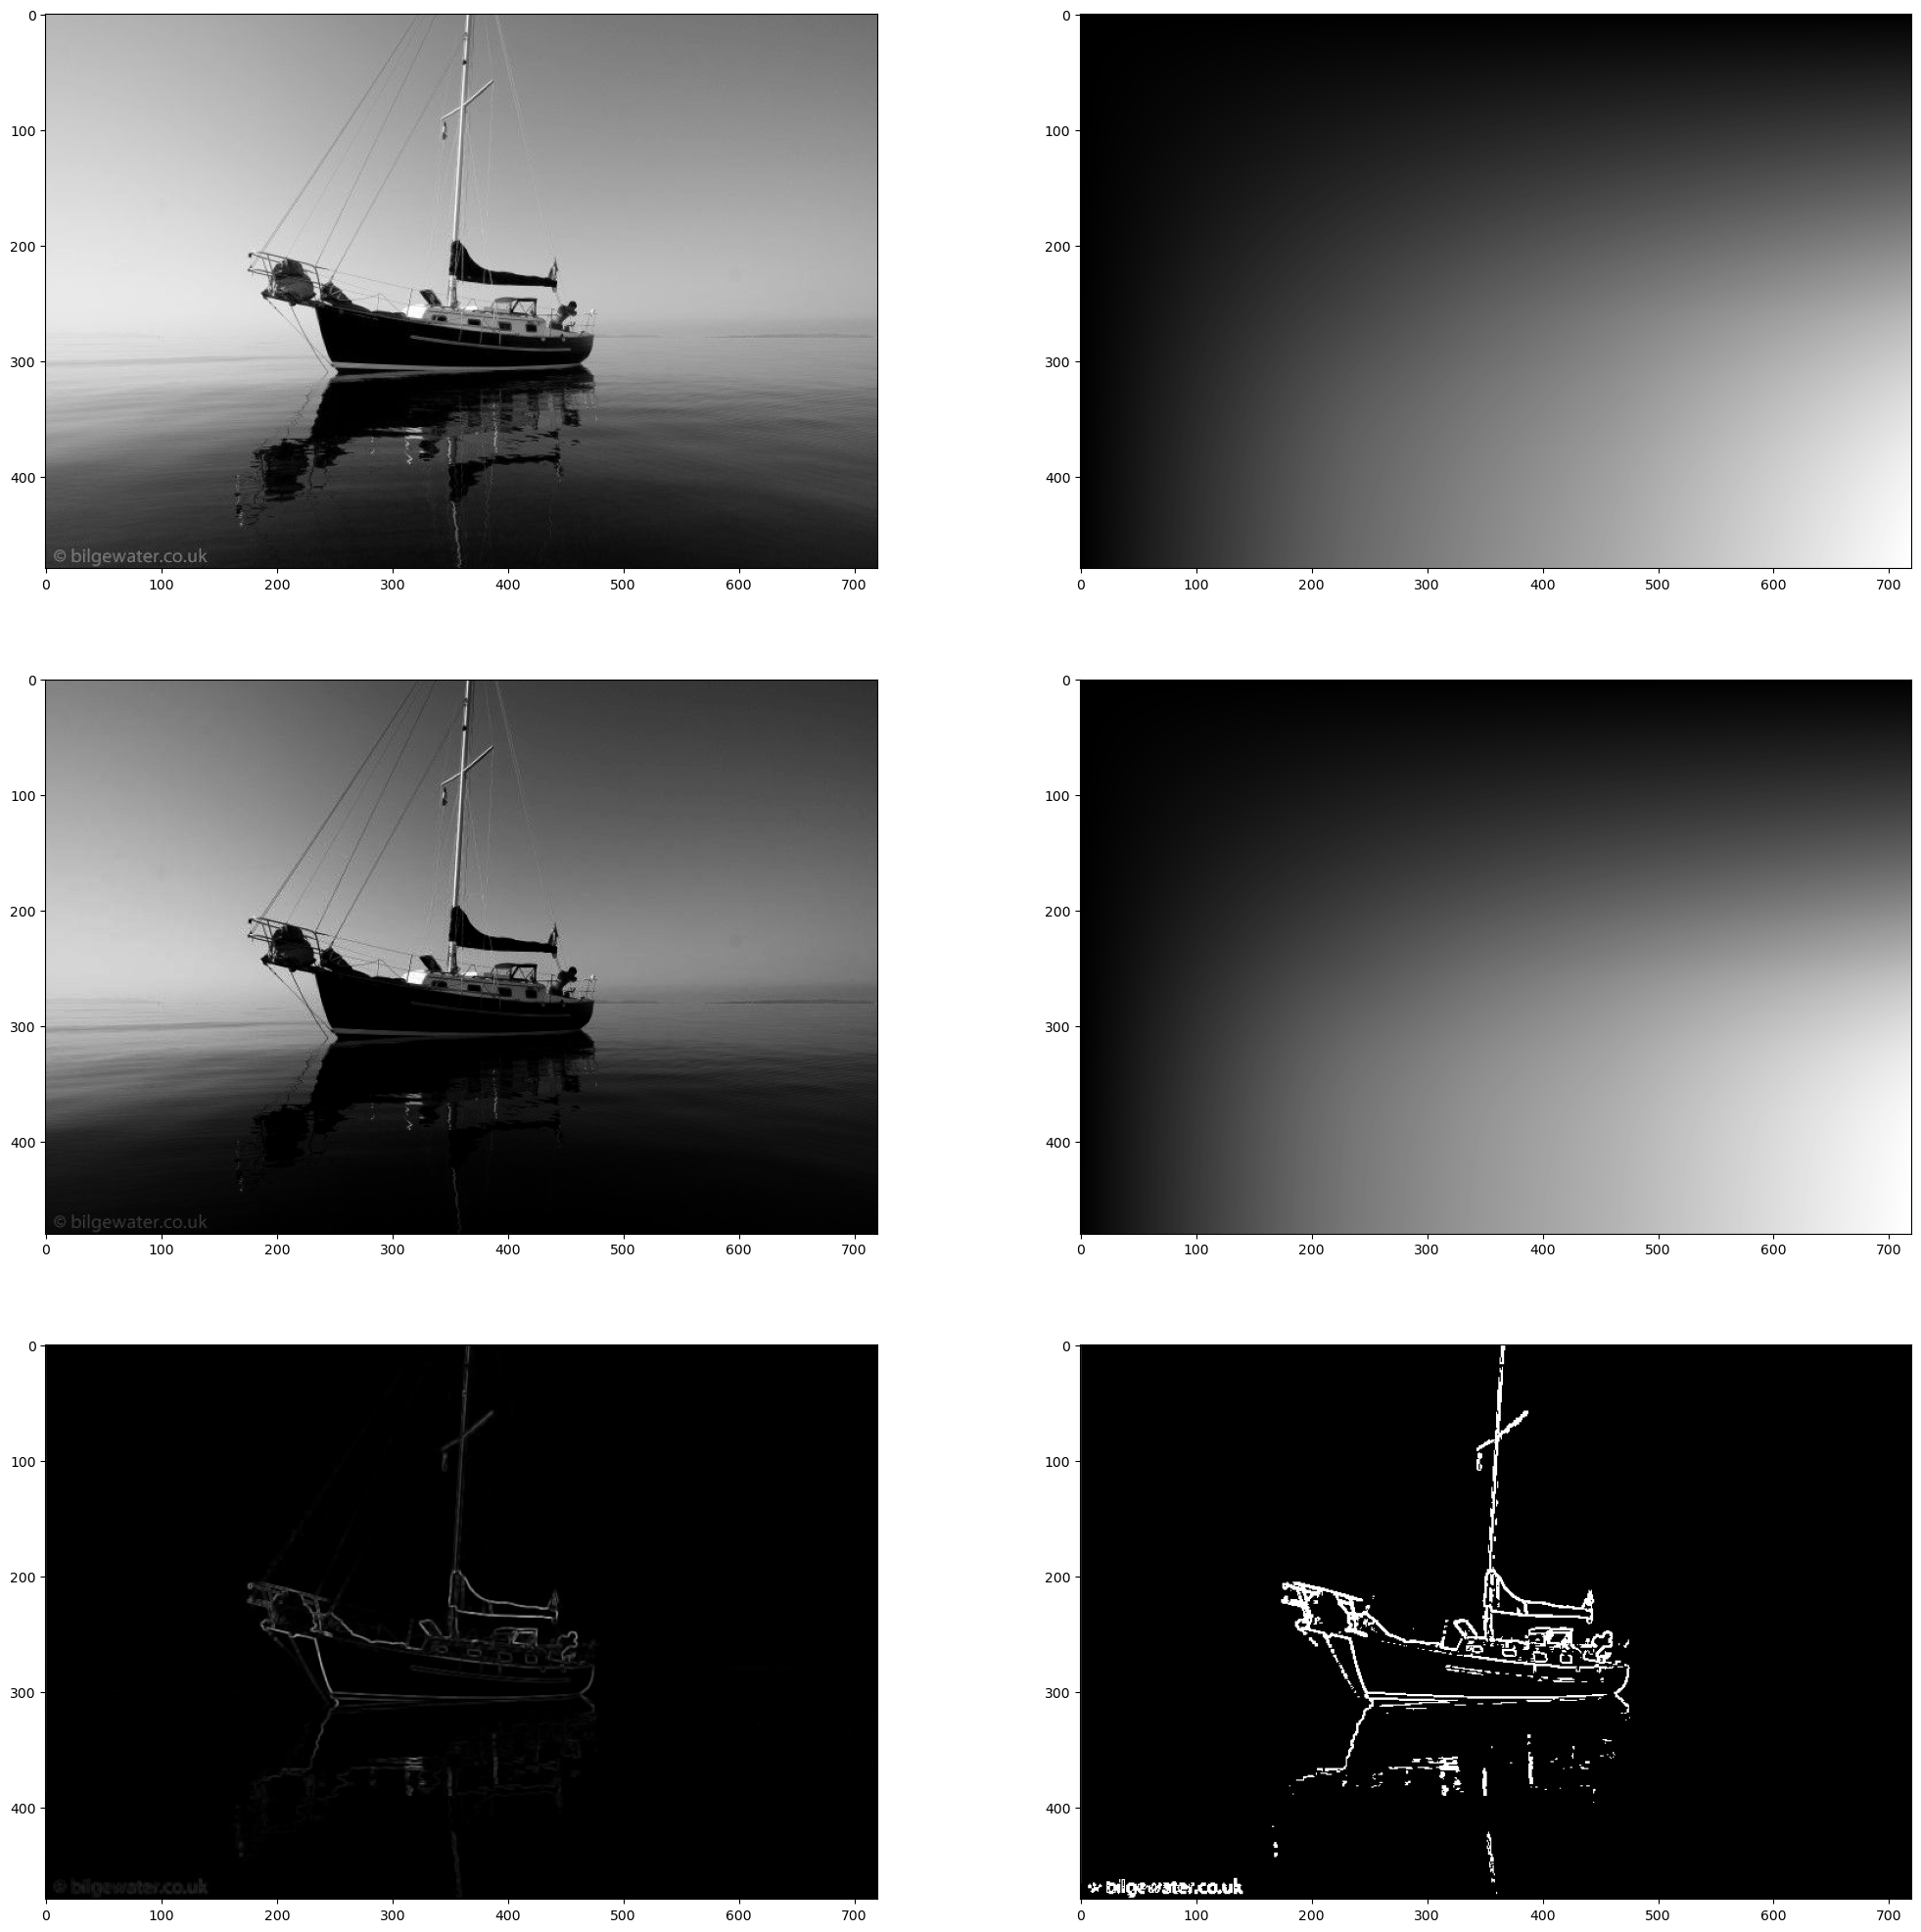

In [76]:

#plt has to be imported, see the previous sections
plt.subplots(nrows=3, ncols=2, figsize=(25, 25))

plt.subplot(3,2,1)
plt.imshow(im_array, cmap='gray')

plt.subplot(3,2,2)
plt.imshow(im_intergral, cmap='gray')

plt.subplot(3,2,3)
plt.imshow(im_square, cmap='gray')

plt.subplot(3,2,4)
plt.imshow(sqr_integral, cmap='gray')

plt.subplot(3,2,5)
plt.imshow(var_im, cmap='gray')

plt.subplot(3,2,6)
plt.imshow(thr_image, cmap='gray')
